# Hierarchical Indexing


In [1]:
#Use the titanic dataset and group by "pclass" first and "sex" second.
#Find the mean of ["survived","age","sibsp","parch"] columns.

In [2]:
import pandas as pd

In [3]:
titanic = pd.read_csv("titanic.csv")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [5]:
# First "age" column must be converted to float from object dt

titanic["age"] = pd.to_numeric(titanic["age"], errors="coerce")

In [6]:
titanic["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1046 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [7]:
titanic.groupby(["pclass","sex"]).mean()

survived        age     sibsp     parch
pclass sex                                            
1      female  0.965278  37.037594  0.555556  0.472222
       male    0.340782  41.029250  0.340782  0.279330
2      female  0.886792  27.499191  0.500000  0.650943
       male    0.146199  30.815401  0.327485  0.192982
3      female  0.490741  22.185307  0.791667  0.731481
       male    0.152130  25.962273  0.470588  0.255578

In [8]:
df1 = titanic.groupby(["pclass","sex"]).mean()

In [9]:
#We createated a multiIndex
df1.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [10]:
#Use the state_pops dataset and group by state then year by using set_index

In [11]:
states = pd.read_csv("state_pops.csv")
states

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


In [12]:
states.set_index(["state","year"], inplace=True)


In [13]:
#use .loc to find the population of Wyoming from 2004 to 2010
states.sort_index(inplace=True)
states

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [14]:
states.loc[("WY",2004):("WY",2010)]

population
state year            
WY    2004    509106.0
      2005    514157.0
      2006    522667.0
      2007    534876.0
      2008    546043.0
      2009    559851.0
      2010    564222.0

In [15]:
#Find the populations of all states for the year 2013

states.xs(2013,level="year")
#or level=1 (same output)

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


In [16]:
#Using .xs find the population of Alaska for every year

states.xs("AL", level="state")

,population
year,
1990,4050055.0
1991,4099156.0
1992,4154014.0
1993,4214202.0
1994,4260229.0
1995,4296800.0
1996,4331103.0
1997,4367935.0
1998,4404701.0


In [17]:
# Use get_level_values to keep only even years

even_years = states[states.index.get_level_values(1) % 2 == 0]
even_years

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1996    608569.0
      1998    619933.0
...                ...
WY    2004    509106.0
      2006    522667.0
      2008    546043.0
      2010    564222.0
      2012    576626.0

[636 rows x 1 columns]

In [20]:
#Use .loc passing both indexes as a tuple (females in class 2, using titanic dataset)

df1.loc[(2,"female")]


survived     0.886792
age         27.499191
sibsp        0.500000
parch        0.650943
Name: (2, female), dtype: float64

<AxesSubplot:xlabel='pclass'>

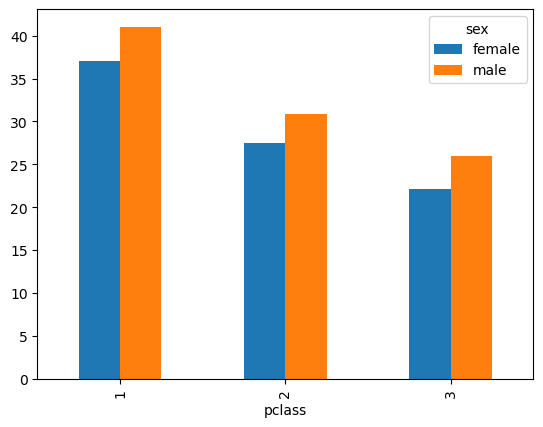

In [25]:
#Using unstack() passing both "pclass" and "sex" as level, and plot both instances for column "age".

df1["age"].unstack().plot(kind="bar")

<AxesSubplot:xlabel='sex'>

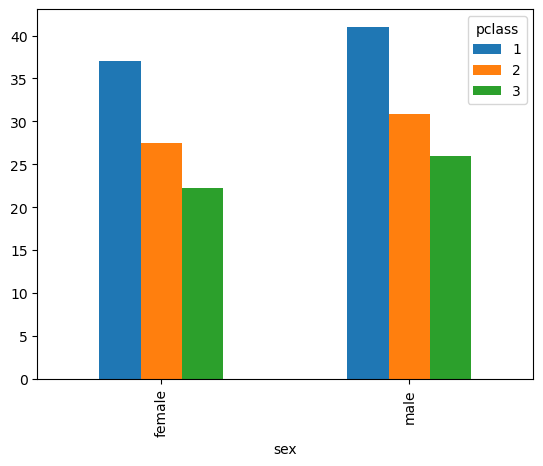

In [27]:
df1["age"].unstack(level="pclass").plot(kind="bar")